Question 2: [Multiclass Classification] [30 pts] Use Keras’ built-in
Reuters dataset (from keras.datasets import reuters) to classify 46
different topics. Use k-fold cross validation and show loss/accuracy
plots by epoch.
	
- Change number of layers, report the difference.

	
- Increase number of hidden units, report the difference.

	
- Decrease number of hidden units, report the difference.


In [1]:
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.regularizers import l1

Using TensorFlow backend.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
import numpy

In [3]:
def make_plot(histories_per_fold):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    ax = plt.axes()
    plt.ylabel('loss')
    plt.xlabel('accuracy')
    plt.title('acc vs loss, epoch by epoch')
    accs = [sum(x)/len(histories_per_fold) for x in zip(*[history.history['acc'] for history in histories_per_fold])]
    losses = [sum(x)/len(histories_per_fold) for x in zip(*[history.history['loss'] for history in histories_per_fold])]
    val_accs = [sum(x)/len(histories_per_fold) for x in zip(*[history.history['val_acc'] for history in histories_per_fold])]
    val_losses = [sum(x)/len(histories_per_fold) for x in zip(*[history.history['val_loss'] for history in histories_per_fold])]
#     for history in histories_per_fold:
#         plt.plot(history.history['acc'],history.history['loss'])
    plt.plot(accs,losses)    
    plt.plot(val_accs, val_losses)

    plt.show()

In [4]:
(X, Y), _ = reuters.load_data(num_words=None, test_split=0)
word_index = reuters.get_word_index(path="reuters_word_index.json")


In [5]:
index_to_word = {}
for key, value in word_index.items():
    index_to_word[value] = key

In [6]:
max_words = 1000

tokenizer = Tokenizer(num_words=max_words)
X = tokenizer.sequences_to_matrix(X, mode='binary')

In [7]:
num_classes = 46

Consider below like the baseline

In [8]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = pd.get_dummies(Y[test])
    Y_train = pd.get_dummies(Y[train])
    
    model = Sequential()
    model.add(Dense(256, kernel_regularizer=l1(0.001), activation='relu', input_shape=(max_words,)))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_regularizer=l1(0.001), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)

Fold no:0
Train on 8959 samples, validate on 2269 samples
Epoch 1/20
8959/8959 [==============================] - 4s 409us/step - loss: 5.0887 - acc: 0.5892 - val_loss: 2.5930 - val_acc: 0.6659
Epoch 2/20
8959/8959 [==============================] - 3s 329us/step - loss: 2.2991 - acc: 0.6630 - val_loss: 2.1230 - val_acc: 0.6827
Epoch 3/20
8959/8959 [==============================] - 3s 329us/step - loss: 2.0403 - acc: 0.6773 - val_loss: 1.9681 - val_acc: 0.6919
Epoch 4/20
8959/8959 [==============================] - 3s 342us/step - loss: 1.9635 - acc: 0.6826 - val_loss: 1.9431 - val_acc: 0.6875
Epoch 5/20
8959/8959 [==============================] - 3s 321us/step - loss: 1.9111 - acc: 0.6827 - val_loss: 1.9396 - val_acc: 0.6884
Epoch 6/20
8959/8959 [==============================] - 3s 370us/step - loss: 1.8854 - acc: 0.6870 - val_loss: 1.8567 - val_acc: 0.6915
Epoch 7/20
8959/8959 [==============================] - 3s 380us/step - loss: 1.8661 - acc: 0.6875 - val_loss: 1.8301 - val_ac

Epoch 20/20
8986/8986 [==============================] - 3s 367us/step - loss: 1.7581 - acc: 0.7131 - val_loss: 1.6312 - val_acc: 0.7386
Fold no:3
Train on 8995 samples, validate on 2233 samples
Epoch 1/20
8995/8995 [==============================] - 4s 429us/step - loss: 5.1410 - acc: 0.5888 - val_loss: 2.5563 - val_acc: 0.6547
Epoch 2/20
8995/8995 [==============================] - 3s 372us/step - loss: 2.3129 - acc: 0.6621 - val_loss: 2.0217 - val_acc: 0.6798
Epoch 3/20
8995/8995 [==============================] - 4s 457us/step - loss: 2.0703 - acc: 0.6745 - val_loss: 1.9458 - val_acc: 0.6820
Epoch 4/20
8995/8995 [==============================] - 3s 385us/step - loss: 1.9616 - acc: 0.6826 - val_loss: 1.8650 - val_acc: 0.6874
Epoch 5/20
8995/8995 [==============================] - 3s 336us/step - loss: 1.9312 - acc: 0.6832 - val_loss: 1.8204 - val_acc: 0.6879
Epoch 6/20
8995/8995 [==============================] - 3s 364us/step - loss: 1.8973 - acc: 0.6866 - val_loss: 1.8021 - val_a

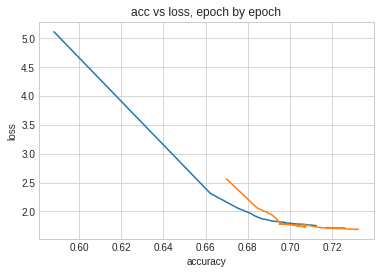

In [9]:
make_plot(histories_per_fold)

In [10]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = pd.get_dummies(Y[test])
    Y_train = pd.get_dummies(Y[train])
    
    model = Sequential()
    model.add(Dense(256, kernel_regularizer=l1(0.001), activation='relu', input_shape=(max_words,)))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_regularizer=l1(0.001), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_regularizer=l1(0.001), activation='relu', input_shape=(max_words,)))
    model.add(Dropout(0.5))
    model.add(Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)


Fold no:0
Train on 8959 samples, validate on 2269 samples
Epoch 1/20
8959/8959 [==============================] - 4s 478us/step - loss: 6.3048 - acc: 0.5363 - val_loss: 2.9608 - val_acc: 0.5738
Epoch 2/20
8959/8959 [==============================] - 4s 428us/step - loss: 2.5112 - acc: 0.5761 - val_loss: 2.3243 - val_acc: 0.5884
Epoch 3/20
8959/8959 [==============================] - 4s 418us/step - loss: 2.2575 - acc: 0.5955 - val_loss: 2.2139 - val_acc: 0.6188
Epoch 4/20
8959/8959 [==============================] - 4s 394us/step - loss: 2.1714 - acc: 0.6181 - val_loss: 2.1265 - val_acc: 0.6399
Epoch 5/20
8959/8959 [==============================] - 3s 381us/step - loss: 2.1392 - acc: 0.6270 - val_loss: 2.1203 - val_acc: 0.6487
Epoch 6/20
8959/8959 [==============================] - 3s 376us/step - loss: 2.1020 - acc: 0.6317 - val_loss: 2.0782 - val_acc: 0.6457
Epoch 7/20
8959/8959 [==============================] - 3s 387us/step - loss: 2.0674 - acc: 0.6356 - val_loss: 2.0502 - val_ac

Epoch 20/20
8986/8986 [==============================] - 3s 341us/step - loss: 2.0191 - acc: 0.6602 - val_loss: 1.8699 - val_acc: 0.6887
Fold no:3
Train on 8995 samples, validate on 2233 samples
Epoch 1/20
8995/8995 [==============================] - 5s 570us/step - loss: 6.2748 - acc: 0.5347 - val_loss: 2.7725 - val_acc: 0.6167
Epoch 2/20
8995/8995 [==============================] - 3s 379us/step - loss: 2.5367 - acc: 0.5959 - val_loss: 2.2462 - val_acc: 0.6435
Epoch 3/20
8995/8995 [==============================] - 3s 368us/step - loss: 2.2908 - acc: 0.6153 - val_loss: 2.1131 - val_acc: 0.6440
Epoch 4/20
8995/8995 [==============================] - 3s 388us/step - loss: 2.1948 - acc: 0.6318 - val_loss: 2.0176 - val_acc: 0.6597
Epoch 5/20
8995/8995 [==============================] - 5s 510us/step - loss: 2.1402 - acc: 0.6461 - val_loss: 2.0147 - val_acc: 0.6547
Epoch 6/20
8995/8995 [==============================] - 3s 386us/step - loss: 2.0974 - acc: 0.6529 - val_loss: 1.9375 - val_a

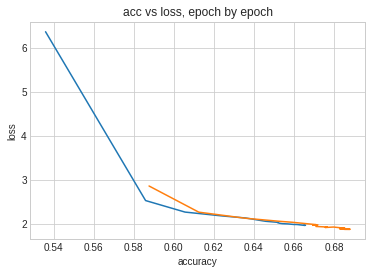

In [11]:
make_plot(histories_per_fold)

Comments:
Added one more layer with dropout:
You can notice that cros-validated accuracy did not increase. Also it doesn't overfit but after 10th epoch the network does not learn further either. 

In [12]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = pd.get_dummies(Y[test])
    Y_train = pd.get_dummies(Y[train])
    
    model = Sequential()
    model.add(Dense(256, kernel_regularizer=l1(0.001), activation='relu', input_shape=(max_words,)))
    model.add(Dropout(0.5))
    model.add(Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)


Fold no:0
Train on 8959 samples, validate on 2269 samples
Epoch 1/30
8959/8959 [==============================] - 3s 356us/step - loss: 3.6919 - acc: 0.6294 - val_loss: 2.1815 - val_acc: 0.6871
Epoch 2/30
8959/8959 [==============================] - 2s 239us/step - loss: 2.0090 - acc: 0.6919 - val_loss: 1.9734 - val_acc: 0.6972
Epoch 3/30
8959/8959 [==============================] - 2s 229us/step - loss: 1.8844 - acc: 0.7059 - val_loss: 1.8830 - val_acc: 0.7162
Epoch 4/30
8959/8959 [==============================] - 2s 235us/step - loss: 1.8262 - acc: 0.7151 - val_loss: 1.8361 - val_acc: 0.7259
Epoch 5/30
8959/8959 [==============================] - 2s 253us/step - loss: 1.7761 - acc: 0.7281 - val_loss: 1.8163 - val_acc: 0.7193
Epoch 6/30
8959/8959 [==============================] - 2s 268us/step - loss: 1.7444 - acc: 0.7395 - val_loss: 1.7611 - val_acc: 0.7528
Epoch 7/30
8959/8959 [==============================] - 2s 218us/step - loss: 1.7087 - acc: 0.7454 - val_loss: 1.7439 - val_ac

8968/8968 [==============================] - 2s 230us/step - loss: 1.5513 - acc: 0.7738 - val_loss: 1.6156 - val_acc: 0.7774
Fold no:2
Train on 8986 samples, validate on 2242 samples
Epoch 1/30
8986/8986 [==============================] - 3s 300us/step - loss: 3.7353 - acc: 0.6318 - val_loss: 2.1157 - val_acc: 0.6994
Epoch 2/30
8986/8986 [==============================] - 2s 224us/step - loss: 2.0317 - acc: 0.6899 - val_loss: 1.8984 - val_acc: 0.7056
Epoch 3/30
8986/8986 [==============================] - 2s 231us/step - loss: 1.8999 - acc: 0.7000 - val_loss: 1.8150 - val_acc: 0.7275
Epoch 4/30
8986/8986 [==============================] - 2s 225us/step - loss: 1.8451 - acc: 0.7147 - val_loss: 1.7631 - val_acc: 0.7391
Epoch 5/30
8986/8986 [==============================] - 2s 230us/step - loss: 1.7974 - acc: 0.7246 - val_loss: 1.7322 - val_acc: 0.7319
Epoch 6/30
8986/8986 [==============================] - 2s 227us/step - loss: 1.7589 - acc: 0.7369 - val_loss: 1.6898 - val_acc: 0.7484
E

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 256)               256256    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 46)                11822     
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
_________________________________________________________________


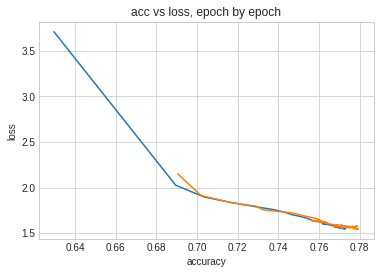

In [14]:
make_plot(histories_per_fold)

Removed one layer:
performance increased instantly. Again it does not seem to overfit and the model keeps learning even after 25th epoch though it slows down. 
The intuition is the problem is not very complex so that a smaller network is sufficient and it generalizes better.


In [15]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = pd.get_dummies(Y[test])
    Y_train = pd.get_dummies(Y[train])
    
    model = Sequential()
    model.add(Dense(max_words, kernel_regularizer=l1(0.001), activation='relu', input_shape=(max_words,)))
    model.add(Dropout(0.5))
    model.add(Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)
    

Fold no:0
Train on 8959 samples, validate on 2269 samples
Epoch 1/30
8959/8959 [==============================] - 6s 695us/step - loss: 5.1321 - acc: 0.6352 - val_loss: 2.7155 - val_acc: 0.6624
Epoch 2/30
8959/8959 [==============================] - 6s 619us/step - loss: 2.5862 - acc: 0.6745 - val_loss: 2.5442 - val_acc: 0.6866
Epoch 3/30
8959/8959 [==============================] - 6s 618us/step - loss: 2.4570 - acc: 0.6918 - val_loss: 2.4489 - val_acc: 0.7135
Epoch 4/30
8959/8959 [==============================] - 6s 633us/step - loss: 2.3636 - acc: 0.7059 - val_loss: 2.3807 - val_acc: 0.7153
Epoch 5/30
8959/8959 [==============================] - 6s 632us/step - loss: 2.2932 - acc: 0.7130 - val_loss: 2.3301 - val_acc: 0.7245
Epoch 6/30
8959/8959 [==============================] - 6s 627us/step - loss: 2.2290 - acc: 0.7278 - val_loss: 2.3527 - val_acc: 0.6915
Epoch 7/30
8959/8959 [==============================] - 6s 634us/step - loss: 2.1835 - acc: 0.7364 - val_loss: 2.2439 - val_ac

8968/8968 [==============================] - 5s 611us/step - loss: 1.9425 - acc: 0.7722 - val_loss: 1.9927 - val_acc: 0.7770
Fold no:2
Train on 8986 samples, validate on 2242 samples
Epoch 1/30
8986/8986 [==============================] - 6s 708us/step - loss: 5.1446 - acc: 0.6273 - val_loss: 2.6100 - val_acc: 0.6704
Epoch 2/30
8986/8986 [==============================] - 5s 612us/step - loss: 2.6098 - acc: 0.6743 - val_loss: 2.5304 - val_acc: 0.6918
Epoch 3/30
8986/8986 [==============================] - 6s 615us/step - loss: 2.4748 - acc: 0.6861 - val_loss: 2.4167 - val_acc: 0.7043
Epoch 4/30
8986/8986 [==============================] - 6s 617us/step - loss: 2.3888 - acc: 0.7050 - val_loss: 2.2556 - val_acc: 0.7070
Epoch 5/30
8986/8986 [==============================] - 6s 615us/step - loss: 2.3246 - acc: 0.7142 - val_loss: 2.1705 - val_acc: 0.7328
Epoch 6/30
8986/8986 [==============================] - 6s 621us/step - loss: 2.2662 - acc: 0.7245 - val_loss: 2.2344 - val_acc: 0.7177
E

there are 2 fully connected layers, the second one has to have 46 neurons so 
I increased number of neurons to the first one to input dimention. It did not really affect that much.
It just slowed down. Probably former value was suffcient and adding more did not improve anything.
Where dropout and l1 regularization prevented overfitting.

In [16]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = pd.get_dummies(Y[test])
    Y_train = pd.get_dummies(Y[train])
    
    model = Sequential()
    model.add(Dense(8, kernel_regularizer=l1(0.001), activation='relu', input_shape=(max_words,)))
    model.add(Dropout(0.5))
    model.add(Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)
    

Fold no:0
Train on 8959 samples, validate on 2269 samples
Epoch 1/20
8959/8959 [==============================] - 3s 317us/step - loss: 2.9004 - acc: 0.3322 - val_loss: 2.0806 - val_acc: 0.5046
Epoch 2/20
8959/8959 [==============================] - 1s 146us/step - loss: 2.1901 - acc: 0.4330 - val_loss: 1.8892 - val_acc: 0.5782
Epoch 3/20
8959/8959 [==============================] - 2s 208us/step - loss: 2.0411 - acc: 0.4658 - val_loss: 1.8099 - val_acc: 0.6082
Epoch 4/20
8959/8959 [==============================] - 1s 138us/step - loss: 1.9679 - acc: 0.4925 - val_loss: 1.7850 - val_acc: 0.6082
Epoch 5/20
8959/8959 [==============================] - 1s 111us/step - loss: 1.9274 - acc: 0.5068 - val_loss: 1.7421 - val_acc: 0.6302
Epoch 6/20
8959/8959 [==============================] - 2s 210us/step - loss: 1.8744 - acc: 0.5147 - val_loss: 1.7259 - val_acc: 0.6241
Epoch 7/20
8959/8959 [==============================] - 1s 165us/step - loss: 1.8499 - acc: 0.5232 - val_loss: 1.6998 - val_ac

Epoch 20/20
8986/8986 [==============================] - 1s 125us/step - loss: 1.7625 - acc: 0.5580 - val_loss: 1.5071 - val_acc: 0.6860
Fold no:3
Train on 8995 samples, validate on 2233 samples
Epoch 1/20
8995/8995 [==============================] - 2s 216us/step - loss: 2.7771 - acc: 0.4053 - val_loss: 1.9841 - val_acc: 0.5374
Epoch 2/20
8995/8995 [==============================] - 1s 111us/step - loss: 2.1755 - acc: 0.4599 - val_loss: 1.8323 - val_acc: 0.5387
Epoch 3/20
8995/8995 [==============================] - 1s 113us/step - loss: 2.0519 - acc: 0.4724 - val_loss: 1.7716 - val_acc: 0.5387
Epoch 4/20
8995/8995 [==============================] - 1s 115us/step - loss: 2.0070 - acc: 0.4716 - val_loss: 1.7292 - val_acc: 0.5414
Epoch 5/20
8995/8995 [==============================] - 1s 112us/step - loss: 1.9564 - acc: 0.4822 - val_loss: 1.6859 - val_acc: 0.5616
Epoch 6/20
8995/8995 [==============================] - 1s 112us/step - loss: 1.9339 - acc: 0.4835 - val_loss: 1.6614 - val_a

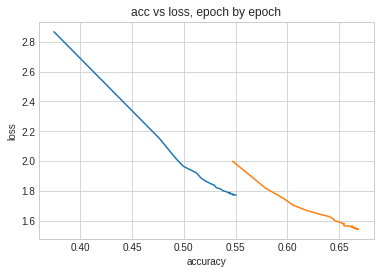

In [17]:
make_plot(histories_per_fold)

Clearly decreasing number of units drastically decreases accuracy effectively.
But in my experiments even with 64 units in the first layer did similar to 256.

The rule of thumb is that hidden layers usually should have number of units between the input 
dimention and output dimetion do. Which I found to be quite intuitive because we would like the layers 
to learn more and more abstract features which are less in number compared to lower level features.